In [1]:
import numpy as np
import multiprocessing as mp
from itertools import product


from visualize_landscape import *
import os

from tqdm import tqdm

torch.set_num_threads(3)
import matplotlib.pyplot as plt

In [2]:

asdf

num_epochs = 1001
datasets = ["two_blobs_separate", "two_blobs_overlap", "half_moons", "spirals", "four_corners"]
gridsize = 10



for width in [5,10,25,50,100]:
    for depth in [1,2,4,8,16]:
        can_copy = True
                
        for dataset in datasets:
            for ab_range in [0.1, .2,.5, 1,2,5 ,10]:

                for epoch in range(0,num_epochs,10):
                    arch = [width for i in range(depth)]


                    CACHE_ROOT = "../backend/landscapes"

                    train_str = 'train' 
                    cache_dir = os.path.join(CACHE_ROOT, arch_to_name(arch), dataset, train_str, f"range{ab_range}",  f"ep{epoch}")
                    cache_xy_dir = os.path.join(CACHE_ROOT, arch_to_name(arch))

                    loss_file = os.path.join(cache_dir, "loss.npy")
                    a_file = os.path.join(cache_dir, "a_vals.npy")
                    b_file = os.path.join(cache_dir, "b_vals.npy")

                    if os.path.exists(loss_file) and os.path.exists(a_file) and os.path.exists(b_file):

                        a = np.load(a_file)
                        b = np.load(b_file)
                        losses = np.load(loss_file)
                        
                        if losses.shape[0]< gridsize:
                            if epoch > 0: print(f"low grid size  {cache_dir}")
                            can_copy = False
                            break
                    else: 
                        print(f"missing  {cache_dir}")
                        can_copy = False
                        break 
                if not can_copy: break
            if not can_copy: break
        if can_copy:
            print(width,depth)

            
            
sadf


NameError: name 'asdf' is not defined

In [ ]:
adsf
    

num_epochs = 1001
datasets = ["two_blobs_separate", "two_blobs_overlap", "half_moons", "spirals", "four_corners"]
gridsize = 100


CACHE_ROOT = "../backend/landscapes"
MODELS_DIR = "../backend/models"

train_str = 'train'  
 

for width in [5,10,25,50,100]:
    for depth in [1,2,4,8,16]:
        can_copy = True
                
        for dataset in datasets:
            for ab_range in [0.1, .2,.5, 1,2,5 ,10]:
 
                arch = [width for i in range(depth)]


                cache_base_dir = os.path.join(CACHE_ROOT, arch_to_name(arch), dataset, train_str, f"range{ab_range}")
                zrange_file = os.path.join(cache_base_dir, f"zrange.npy")


                # --- If zrange already exists, skip ---
                if not os.path.exists(zrange_file) :

                    can_copy = False
                    break 
            if not can_copy: break
        if can_copy:
            print(width,depth)

            
            
   






In [ ]:

asdf

num_epochs = 1001
datasets = ["two_blobs_separate", "two_blobs_overlap", "half_moons", "spirals", "four_corners"]
widths = [5,10,25,50,100] 
depths = [1,2,4,8,16]  
ab_ranges = [0.1,.2,.5, 1, 2,5,10]
epochs = list(range(0, num_epochs, 10))
gridsize = 10

for width in widths:
    for depth in depths:
        arch = [width] * depth
        
        for dataset in datasets:

            for ab_range in ab_ranges:
                print(f"{width=} {depth=} {dataset=} {ab_range=}", end='')
                for epoch in epochs:
                    print('.',end='')
                    check_if_defective( arch,  dataset, train=True, epoch=epoch, ab_range=ab_range, gridsize=gridsize, remove = True)
                print('\n')
asdf

Loss matrix shape counts:
(5, 1),100: 3110
(5, 1),50: 259
(5, 1),25: 166
(5, 2),100: 3136
(5, 2),50: 214
(5, 2),25: 185
(5, 4),100: 2993
(5, 4),25: 252
(5, 4),50: 290
(5, 8),100: 2815
(5, 8),50: 441
(5, 8),25: 279
(5, 16),100: 2058
(5, 16),25: 432
(5, 16),50: 1045
(10, 1),100: 3233
(10, 1),25: 137
(10, 1),50: 165
(10, 1),10: 98
(10, 2),100: 1219
(10, 2),50: 1588
(10, 2),25: 726
(10, 2),10: 2
(10, 4),50: 588
(10, 4),25: 2445
(10, 4),100: 502
(10, 8),25: 808
(10, 8),50: 2016
(10, 8),100: 706
(10, 8),10: 5
(10, 16),25: 551
(10, 16),50: 1565
(10, 16),100: 1417
(10, 16),10: 2
(25, 1),50: 2029
(25, 1),25: 773
(25, 1),100: 722
(25, 1),10: 11
(25, 2),50: 2114
(25, 2),100: 630
(25, 2),25: 785
(25, 2),10: 6
(25, 4),50: 1946
(25, 4),25: 834
(25, 4),100: 750
(25, 4),10: 5
(25, 8),50: 2044
(25, 8),25: 768
(25, 8),100: 712
(25, 8),10: 11
(25, 16),25: 644
(25, 16),100: 943
(25, 16),50: 1946
(25, 16),10: 2
(50, 1),25: 985
(50, 1),50: 1839
(50, 1),100: 704
(50, 1),10: 7
(50, 2),25: 978
(50, 2),50: 1908

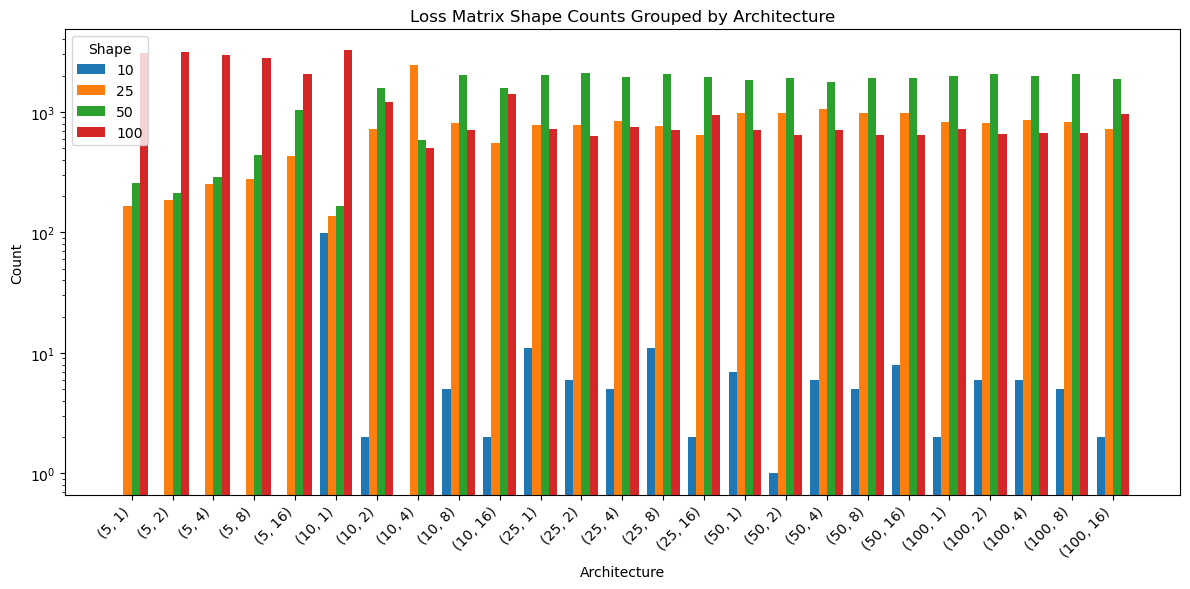

In [32]:


def safe_load_npy(file_path, max_retries=5, delay=1.0):
    """Try loading a .npy file with retries if access fails."""
    for attempt in range(max_retries):
        try:
            return np.load(file_path)
        except (OSError, PermissionError) as e:
            print(f"Access error on {file_path} (attempt {attempt+1}/{max_retries}): {e}")
            time.sleep(delay)
        except Exception as e:
            print(f"Non-access error on {file_path}: {type(e).__name__}: {e}")
            break
    return None  # if all retries failed or non-retryable error occurred


def count_loss_shapes(root_dir):
    shape_counter = {}
    
    for width in [5,10,25,50,100]:
        for depth in [1,2,4,8,16]:

            shape_counter[(width,depth)] = {}
     

    for dirpath, _, filenames in os.walk(root_dir):
         
        
        words = dirpath.split('/')

        words = [w for w in words if 'mlp' in w]
        if len(words) == 0: continue


        arch = [int(w) for w in words[0].split('_')[1:]]
        
        #archstring = '_'.join([str(w) for w in arch])
        
        #archstring = len(arch)
        archstring  = (arch[0],len(arch))
      
        if archstring not in shape_counter:
            shape_counter[archstring] = {}
        
        for filename in filenames:
            if filename == "loss.npy":
                file_path = os.path.join(dirpath, filename)
                try:
                    
                    data = safe_load_npy(file_path)
                    if data is None:
                        data = np.load(file_path)
                except Exception as e:
                    print(f"Error loading {file_path}: {e}")
                    asdf
                shape = data.shape[0]
                if shape not in shape_counter[archstring]:
                    shape_counter[archstring][shape] = 1
                else:
                    shape_counter[archstring][shape] += 1

    return shape_counter

root_directory = "../backend/landscapes" 
counts = count_loss_shapes(root_directory)

print("Loss matrix shape counts:")
for arch, countdict in counts.items():
    for shape, count in countdict.items():
        print(f"{arch},{shape}: {count}")
        
        


archs = sorted(counts.keys())
shapes = sorted({shape for arch_dict in counts.values() for shape in arch_dict})

# rows = architectures, cols = shapes
data = np.zeros((len(archs), len(shapes)), dtype=int)
for i, arch in enumerate(archs):
    for j, shape in enumerate(shapes):
        data[i, j] = counts[arch].get(shape, 0)

x = np.arange(len(archs))  # architecture positions
bar_width = 0.8 / len(shapes)

plt.figure(figsize=(12, 6))
for j, shape in enumerate(shapes):
    plt.bar(x + j * bar_width, data[:, j], width=bar_width, label=f"{shape}")

plt.xticks(x + bar_width * (len(shapes)-1)/2, archs, rotation=45, ha='right')
plt.ylabel("Count")
plt.xlabel("Architecture")
plt.yscale('log')
plt.title("Loss Matrix Shape Counts Grouped by Architecture")
plt.legend(title="Shape")
plt.tight_layout()

